<a href="https://colab.research.google.com/github/abdulmukit98/Tensorflow-in-practice-specialization/blob/master/Natural_Language_Processing_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.0.0-beta0


# Sentiment in text

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

letter = [
             'I love my ball',
             'I love my bat',
             'you love my bat',
             'Do you think my ball is amusing?'
]
model = Tokenizer(num_words = 100)
model.fit_on_texts(letter)  #fit_generator
word_index = model.word_index # indexize
# the encoded formation
sequences = model.texts_to_sequences(sentences)

print (word_index)
print (sequences)

{'my': 1, 'love': 2, 'i': 3, 'ball': 4, 'bat': 5, 'you': 6, 'do': 7, 'think': 8, 'is': 9, 'amusing': 10}
[[3, 2, 1, 4], [3, 2, 1, 5], [6, 2, 1, 5], [7, 6, 8, 1, 4, 9, 10]]


In [0]:
#End of vocabulary case
letter2 = [
           'i really love my bat',
           'you love my cricket ball'
]
letter2_seq = model.texts_to_sequences(letter2)
print(letter2_seq)

#use previous fit on text index and implement in new letter

[[3, 2, 1, 5], [6, 2, 1, 4]]


###out of vocabulary token

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

letter1 = [
           'i love my bat',
           'i love my ball',
           'you love my bat',
           'do you think my bat is good?'
]

model = Tokenizer(
    num_words = 100,
    oov_token = "OOV"
)
model.fit_on_texts(letter1)
word_index = model.word_index


letter1_seq = model.texts_to_sequences(letter1)

test = [
        'I really love my pen',
        'my dress is awsome'
]
test_seq = model.texts_to_sequences(test)

print(word_index)
print(test_seq)

{'OOV': 1, 'my': 2, 'love': 3, 'bat': 4, 'i': 5, 'you': 6, 'ball': 7, 'do': 8, 'think': 9, 'is': 10, 'good': 11}
[[5, 1, 3, 2, 1], [2, 1, 10, 1]]


###Padding

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

article = [
           'I love my bat',
           'I love my ball',
           'you love my bat',
           'Do you think my bat good'
]
model = Tokenizer(
    num_words = 100,
    oov_token = "<OOV>"
)
model.fit_on_texts(article)
index = model.word_index
print('Word index = ',index)

seq = model.texts_to_sequences(article)
print('\n seq = ',seq)
padded = pad_sequences(seq)
print('\n padded \n', padded)

Word index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'bat': 4, 'i': 5, 'you': 6, 'ball': 7, 'do': 8, 'think': 9, 'good': 10}

 seq =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10]]

 padded 
 [[ 0  0  5  3  2  4]
 [ 0  0  5  3  2  7]
 [ 0  0  6  3  2  4]
 [ 8  6  9  2  4 10]]


###Sarcasm datasets`

In [0]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O /tmp/sarcasm.json

In [0]:
import json

with open("/tmp/sarcasm.json", 'r') as i:
  datastore = json.load(i)

sentences = []
labels = []
urls = []
for i in datastore:
  sentences.append(i['headline'])
  labels.append(i['is_sarcastic'])
  urls.append(i['article_link'])

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
model = Tokenizer(
    oov_token = "<OOV>"
)
model.fit_on_texts(sentences)

index = model.word_index
print('word_index = ', index)
seq = model.texts_to_sequences(sentences)
padded  = pad_sequences(seq, padding = 'post')

print('\n\n',sentences[2])
print('\n',padded[2])
print('\n',padded.shape)

word_index =  {'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'after': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'it': 27, 'that': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'all': 35, 'just': 36, 'who': 37, 'has': 38, 'will': 39, 'more': 40, 'one': 41, 'into': 42, 'report': 43, 'year': 44, 'why': 45, 'have': 46, 'area': 47, 'over': 48, 'donald': 49, 'u': 50, 'day': 51, 'says': 52, 's': 53, 'can': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'her': 59, "trump's": 60, 'old': 61, 'no': 62, 'get': 63, 'off': 64, 'an': 65, 'life': 66, 'people': 67, 'obama': 68, 'now': 69, 'house': 70, 'still': 71, "'": 72, 'women': 73, 'make': 74, 'was': 75, 'than': 76, 'white': 77, 'back': 78, 'my': 79, 'i': 80, 'clinton': 81, 'down': 82, 'if': 83, '5': 84, 'when': 85, 'world': 86, 'could': 87,

# Word Embeddings 
###IMDB Datasets

In [0]:
import tensorflow as tf
#!pip install tensorflow==2.0.0-beta0
print (tf.__version__)
!pip install -q tensorflow-datasets

     |████████████████████████████████| 87.9MB 51kB/s 
     |████████████████████████████████| 501kB 56.0MB/s 
     |████████████████████████████████| 3.1MB 44.7MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


1.15.0


In [0]:
import tensorflow_datasets as tfds
imdb, info = tfds.load(
    "imdb_reviews",
    with_info = True,
    as_supervised = True
)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [0]:
import numpy as np
train_data , test_data = imdb['train'], imdb['test']

print(info) #acknoledgement

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data :
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())


# print(training_labels)  # array of 1,0  +ve -ve review
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)
#array to np array


tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=0.1.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(
    num_words = vocab_size,
    oov_token = oov_tok
)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(training_sentences)
train_padded = pad_sequences(
    train_seq,
    maxlen = max_length,
    truncating = trunc_type
)

test_seq = tokenizer.texts_to_sequences(testing_sentences)
test_padded = pad_sequences(
    test_seq,
    maxlen = max_length
)


#reverse the WORD INDEX
reverse_word_index = dict([
        (value, key) for(key, value) in word_index.items()
])


###Tensorflow section

In [0]:
import tensorflow.keras.layers as tfl
model = tf.keras.Sequential([
      tfl.Embedding(
          vocab_size,
          embedding_dim,
          input_length = max_length
      ),
      tfl.Flatten(),
      tfl.Dense(6, activation='relu'),
      tfl.Dense(1, activation='sigmoid')
])
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop', #rmsprop, adam
    metrics = ['acc']
)
model.fit(
    train_padded,
    training_labels,
    epochs = 10,
    validation_data = (
        test_padded,
        testing_labels
    )
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 4s 156us/sample - loss: 0.5138 - acc: 0.7340 - val_loss: 0.3488 - val_acc: 0.8493
Epoch 2/10
25000/25000 [==============================] - 4s 145us/sample - loss: 0.3018 - acc: 0.8728 - val_loss: 0.3369 - val_acc: 0.8519
Epoch 3/10
25000/25000 [==============================] - 4s 145us/sample - loss: 0.2267 - acc: 0.9116 - val_loss: 0.3536 - val_acc: 0.8459
Epoch 4/10
25000/25000 [==============================] - 4s 145us/sample - loss: 0.1501 - acc: 0.9470 - val_loss: 0.4187 - val_acc: 0.8293
Epoch 5/10
25000/25000 [==============================] - 4s 148us/sample - loss: 0.0808 - acc: 0.9758 - val_loss: 0.4909 - val_acc: 0.8201
Epoch 6/10
25000/25000 [==============================] - 4s 147us/sample - loss: 0.0346 - acc: 0.9918 - val_loss: 0.6072 - val_acc: 0.8098
Epoch 7/10
25000/25000 [==============================] - 4s 144us/sample - loss: 0.0132 - acc: 0.9968 - val_l

###Reload data in 2 files

In [0]:
#OUTPUT of our embedding
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [0]:
import io
out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for i in range(1, vocab_size):
  word = reverse_word_index[i]
  embeddings = weights[i]
  out_m.write(word + "\n")
  
  out_v.write(
      '\t'.join([str(x) for x in embeddings]) + "\n" 
      )

out_v.close()
out_m.close()



###Download data

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [0]:

text = 'I really think this is amuzing. awsome'
text_seq = tokenizer.texts_to_sequences(text)
print(text_seq)

[[11], [], [1430], [968], [4], [1537], [1537], [4738], [], [790], [2015], [11], [2922], [2191], [], [790], [2015], [11], [579], [], [11], [579], [], [4], [1783], [1221], [4508], [11], [2922], [1277], [], [], [4], [2012], [579], [1005], [1783], [968]]


###sarcasm datasets with training

In [0]:
!wget --no-check-certificate \
http://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
-O /tmp/sarcasm.json

--2020-01-16 12:36:40--  http://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-01-16 12:36:40 (126 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

with open("/tmp/sarcasm.json", 'r') as i:
  datastore = json.load(i)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

train_sentence = sentences[0 : training_size]
test_sentence = sentences[training_size : ]

train_labels = labels[0 : training_size]
test_labels = labels[training_size : ]

In [0]:
tokenizer = Tokenizer(
    num_words = vocab_size,
    oov_token = oov_tok
)
tokenizer.fit_on_texts(train_sentence)
index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(train_sentence)
train_pad = pad_sequences(
    train_seq,
    maxlen = max_length,
    padding = padding_type,
    truncating = trunc_type
)

test_seq = tokenizer.texts_to_sequences(test_sentence)
test_padded = pad_sequences(
    test_seq,
    maxlen = max_length,
    padding = padding_type,
    truncating = trunc_type
)

import tensorflow.keras.layers as tfl
model = tf.keras.Sequential([
            tfl.Embedding(
                vocab_size,
                embedding_dim,
                input_length = max_length
            ),
            tfl.GlobalAveragePooling1D(),
            tfl.Dense(24, activation='relu'),
            tfl.Dense(1, activation='sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop', #adam
    metrics = ['acc']
)
model.summary()

history = model.fit(
   train_pad,
   train_labels,
   epochs = 30,
   validation_data = (
       test_padded,
       test_labels
   )
)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_8 ( (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 [==============================] - 2s 83us/sample - loss: 0.6328 - acc: 0.6387 -

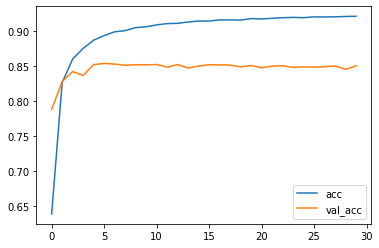

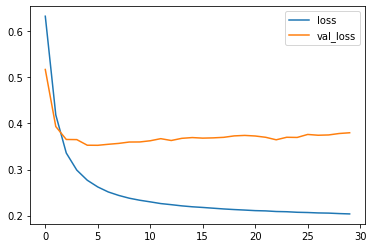

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='acc')
plt.plot(epochs, val_acc, label = 'val_acc')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label = 'val_loss')
plt.legend()

#Sub-word tokenizing

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
imdb, info = tfds.load(
    "imdb_reviews/subwords8k",
    with_info = True,
    as_supervised = True
)

KeyboardInterrupt: ignored

In [0]:
train_data, test_data = imdb['train'], imdb['test']

tokenizer = info.features['text'].encoder

print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [0]:
sample_string = 'Tensorflow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('The original string: {}'.format(original_string))

for ts in tokenized_string:
  print('{}----->{}'.format(ts, tokenizer.decode([ts])))

Tokenized string is [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: Tensorflow, from basics to mastery
6307----->Ten
2327----->sor
2934----->flow
2----->, 
48----->from 
4249----->basi
4429----->cs 
7----->to 
2652----->master
8050----->y


###Tensorflow works

In [0]:
import tensorflow.keras.layers as tfl
embedding_dim = 64
model = tf.keras.Sequential([
      tfl.Embedding(
          tokenizer.vocab_size,
          embedding_dim
      ),
      tfl.GlobalAveragePooling1D(),
      tfl.Dense(6, activation='relu'),
      tfl.Dense(1, activation='sigmoid')
])
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics=['acc']
)
model.summary()

history = model.fit(
    train_data,
    epochs=3,
    
    validation_data = test_data
)


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_17  (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
25000/25000 [==============================] - 324s 13ms/step - loss: 0.6859 - acc: 0.5376 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/3
25000/25000 [==============================] - 152s 6ms/step - loss: 0.6843 - acc: 0.5441

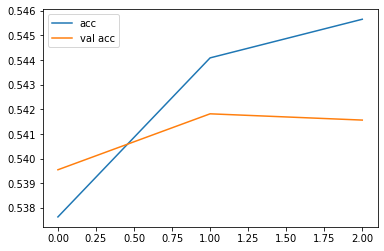

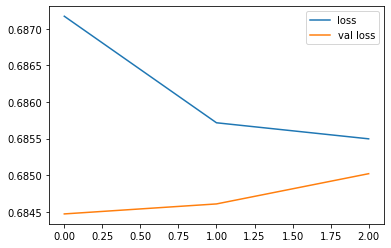

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, label = 'acc')
plt.plot(epochs, val_acc, label = 'val acc')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label = 'loss')
plt.plot(epochs, val_loss, label = 'val loss')
plt.legend()